# SURAJ VERMA
# The Sparks Foundation Internship
# TASK #4 - Exploratory Data Analysis (EDA)
# Global Terrorism Dataset

In [1]:
# Importig required libraries for data manipulation and plotting.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file.
terror = pd.read_csv('terror.csv', encoding='ISO-8859-1')

# Displaying the first 5 rows.
pd.set_option('max_columns', 135)
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
terror.columns  # Coulumn names

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
terror.shape

(181691, 135)

In [5]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# Let's just take important columns for further analysis.

terror = terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [9]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
terror['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

In [11]:
# We can see above the top 5 countries with most attacks.
# Iraq is at the top followed by Pakistan, Afghanistan, India and Colombia.

In [12]:
terror['city'].value_counts().head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: city, dtype: int64

In [13]:
# We can see that the most attacked city is unkown in the data.
# Baghdad is the second most attacked city, followed by Karachi, Lima and Mosul.

In [14]:
print('Country with most attacks: ' + terror['Country'].value_counts().idxmax())
print('STATE with most attacks: ' + terror['state'].value_counts().idxmax())
print('Region with most attacks: ' + terror['Region'].value_counts().idxmax())
print('Year with most attacks: ', terror['Year'].value_counts().idxmax())
print('Month with most attacks: ', terror['Month'].value_counts().idxmax(), 'th month which is May')

Country with most attacks: Iraq
STATE with most attacks: Baghdad
Region with most attacks: Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5 th month which is May


In [15]:
terror.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [16]:
terror.cov()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,175.812496,0.006242,2.133346,40.951530,1.059590e+04,2.292652,7.019333
Month,0.006242,11.480600,0.164158,-1.005279,-2.692110e+03,0.135442,0.357870
Day,2.133346,0.164158,77.687385,0.559877,-4.120870e+03,-0.375477,-0.401569
latitude,40.951530,-1.005279,0.559877,344.816764,5.564253e+03,-3.822593,10.634340
longitude,10595.897714,-2692.109846,-4120.870170,5564.252921,4.193443e+10,-1358.855169,1740.424297
Killed,2.292652,0.135442,-0.375477,-3.822593,-1.358855e+03,133.304125,188.711482
Wounded,7.019333,0.357870,-0.401569,10.634340,1.740424e+03,188.711482,1292.358771


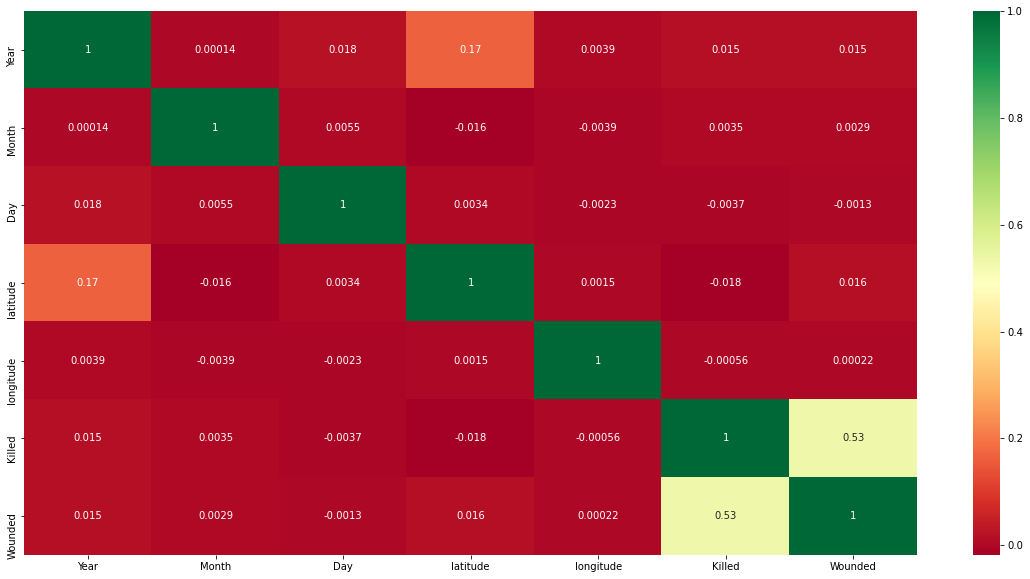

In [17]:
# Heatmap for the correaltion between all the numerical columns of the data.

plt.figure(figsize=(20,10))
corr = terror.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn');

Text(0, 0.5, 'NUMBER OF ATTACKS')

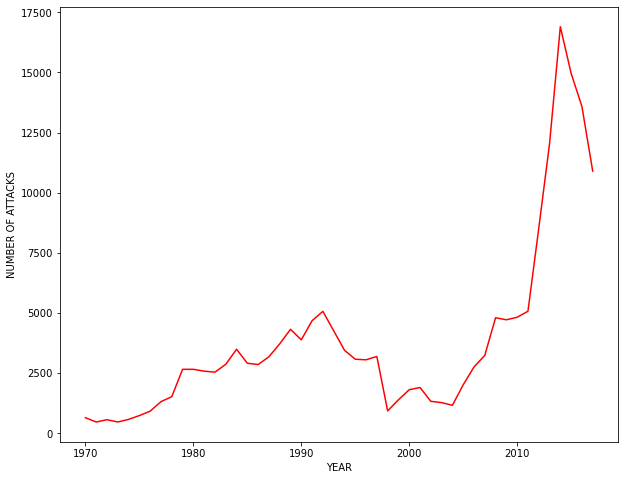

In [18]:
# PLotting the number of attacks against the year.
# Line plot.

df = terror['Year'].value_counts().sort_index()
no_of_attacks = np.array(terror['Year'].value_counts().sort_index())
years = np.array(df.index)

fig = plt.figure(figsize=(10,8))
plt.plot(years, no_of_attacks, 'r-')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF ATTACKS')

Text(0, 0.5, 'NUMBER OF ATTACKS')

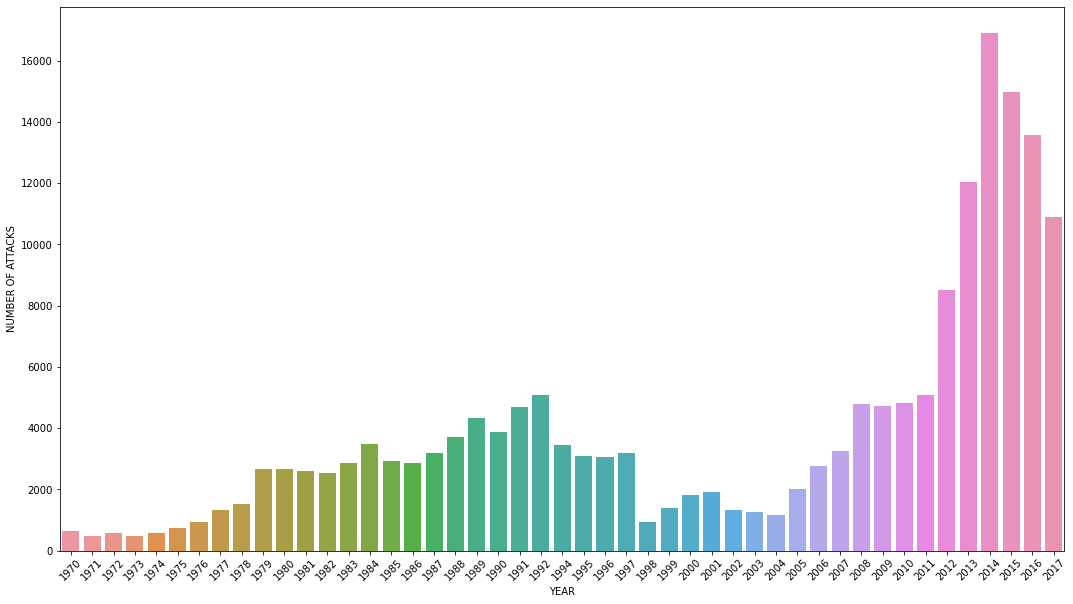

In [19]:
# PLotting the number of attacks against the year.
# Bar plot.

plt.figure(figsize = (18,10))
sns.barplot(x = years, y = no_of_attacks)
plt.xticks(rotation = 45)
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF ATTACKS')

In [20]:
# We can see 2 peaks from the above bar chart. One is at 1992 and other is at 2014.

# In the most recent year, i.e, 2017, more than 10,000 attacks have been reported which is a quite haunting fact.

# There is bump in terrorist attcks from 2011 to 2012 and number of attacks had been iincreasing till 2014 and slowed down a 
# little after that.

Text(0.5, 1.0, 'Number Of Casualities Each Year')

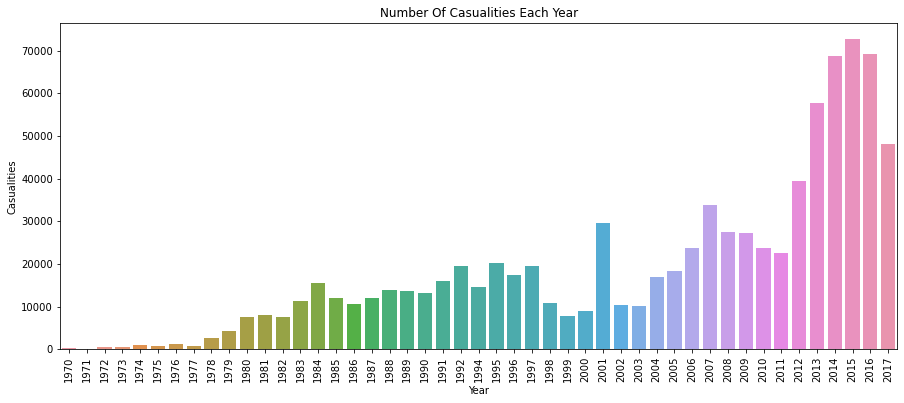

In [21]:
# Looking at the number of casualities over the years.

terror['Casualities'] = terror['Killed'] + terror['Wounded']

plt.subplots(figsize=(15,6))
cas = terror.groupby('Year').Casualities.sum().to_frame().reset_index()
cas.columns = ['Year','Casualities']
sns.barplot(x=cas.Year, y=cas.Casualities)
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')

In [22]:
# The number of casualities have been increasing on average over the years.

# The number of casualities have crossed the 70,000 mark in years 2014, 2015 and 2016.

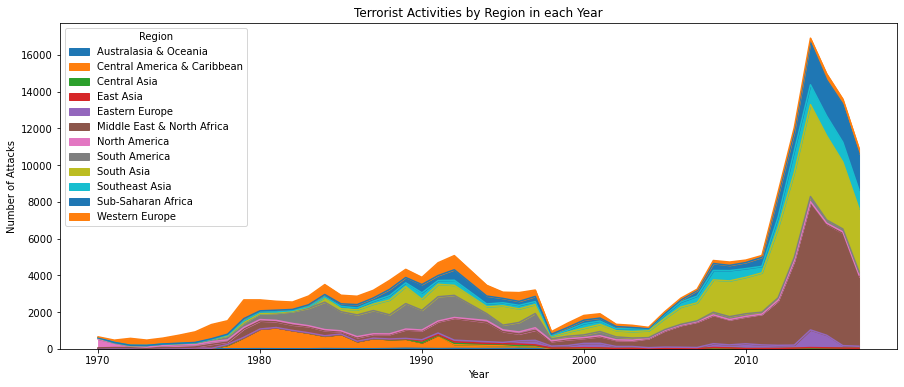

In [23]:
# Let's now look at number of attacks over different region throughout the years.

pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [24]:
# We can see that South Asia along with Middle East and North Africa have the most attacks after 2010.

In [25]:
# Top 20 terrorized countries.

terror['Country'].value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

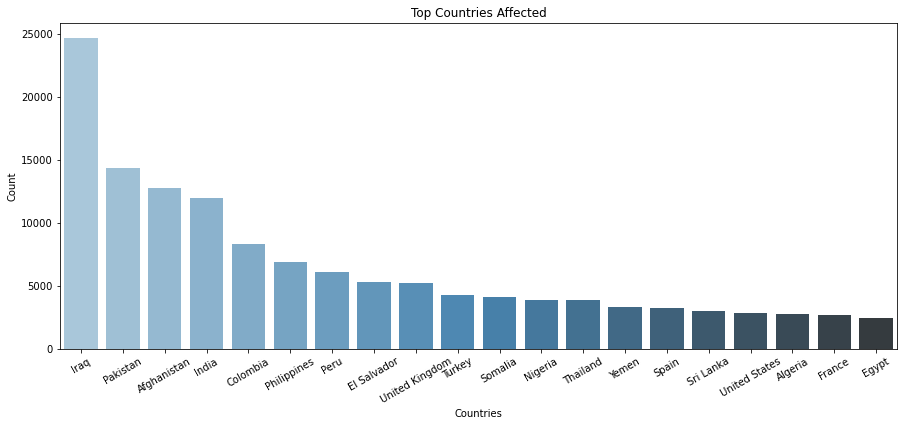

In [26]:
# Plotting number of attacks of the top 20 terrorized countries.

plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:20].index,terror['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 30)
plt.show()

In [27]:
# We can see the top 20 countries most affected by terrorist attacks.

# Iraq is the most affected coutry.
# India is at number 4.

In [28]:
terror['Group'].nunique()

# There are 3537 different Attack groups in this data which is quite surprising.

3537

Text(0.5, 1.0, 'Terrorist Groups with Highest Terror Attacks')

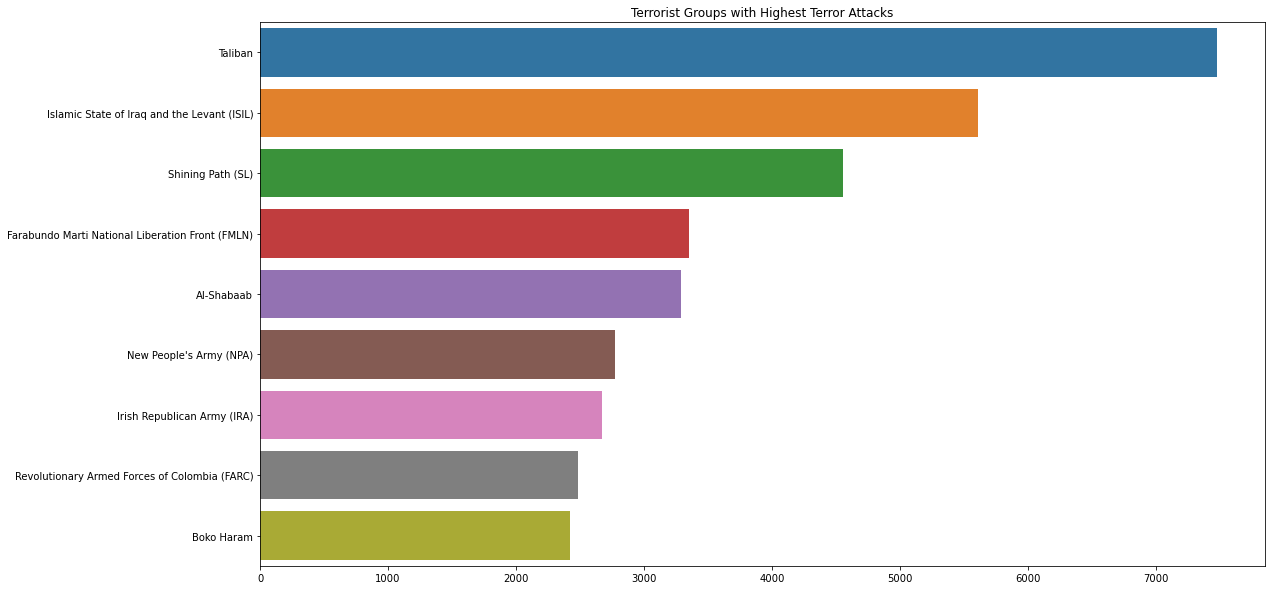

In [29]:
# Top 10 Terror attack groups against the number of attacks.

plt.figure(figsize = (18,10))
sns.barplot(terror['Group'].value_counts()[1:10].values, terror['Group'].value_counts()[1:10].index)
plt.title('Terrorist Groups with Highest Terror Attacks')

In [30]:
# Taliban is the group with most terror attacks, followed by ISIL and SL.

Text(0.5, 1.0, 'Target type with Highest Terror Attacks')

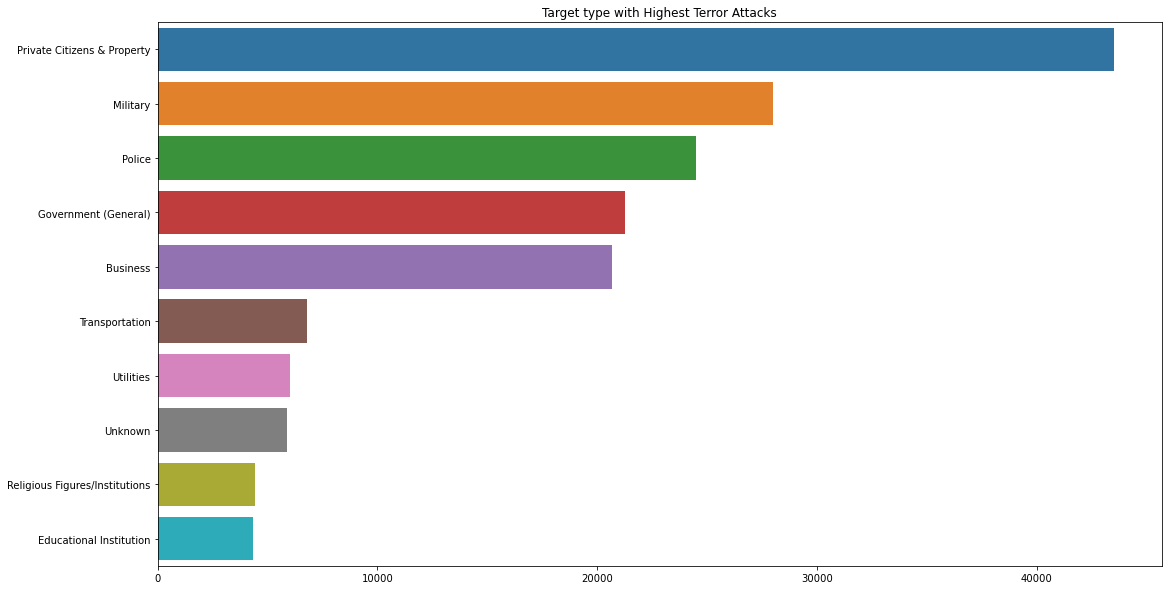

In [31]:
# Top 10 Target type against the number of attacks.

plt.figure(figsize = (18,10))
sns.barplot(terror['Target_type'].value_counts()[:10].values, terror['Target_type'].value_counts()[:10].index)
plt.title('Target type with Highest Terror Attacks')

In [32]:
# It seems terrorists mostly attack on private citizens and property.

# They also quite often attack on military, police, government and business offices.

Text(0.5, 1.0, 'Target with Highest Terror Attacks')

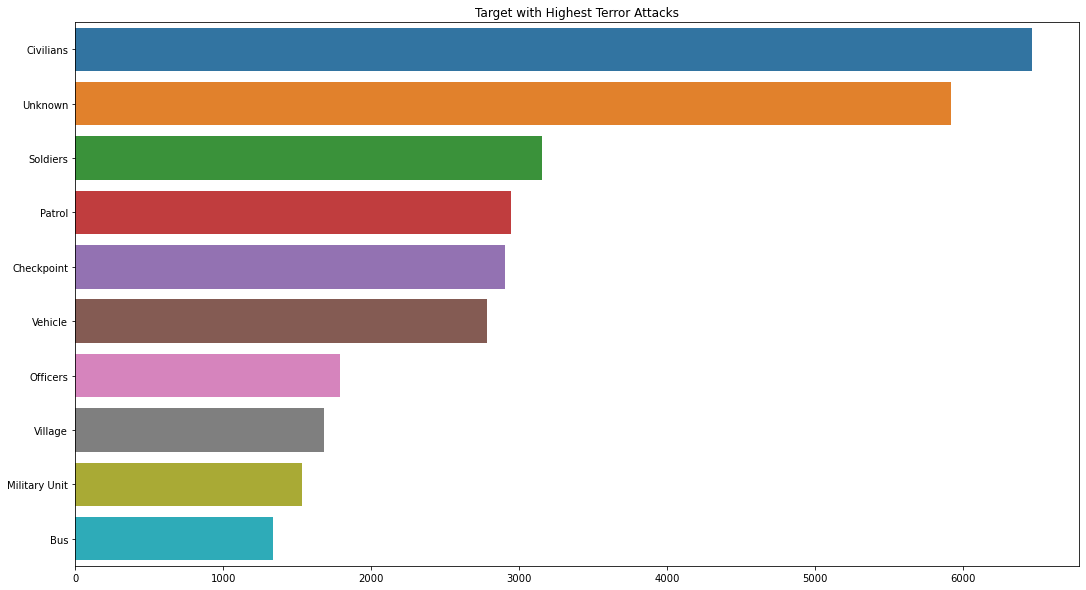

In [33]:
# Top 10 Targets against the number of attacks.

plt.figure(figsize = (18,10))
sns.barplot(terror['Target'].value_counts()[:10].values, terror['Target'].value_counts()[:10].index)
plt.title('Target with Highest Terror Attacks')

In [34]:
# Similarly as above, Civilians are favourite targets for the terrorists.

Text(0.5, 1.0, 'Motives of Highest Terror Attacks')

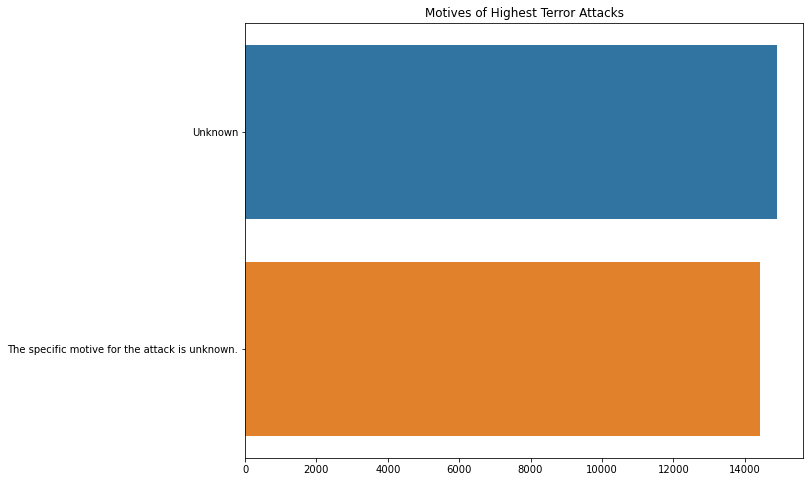

In [35]:
# Top motives against the number of attacks.


plt.figure(figsize = (10,8))
sns.barplot(terror['Motive'].value_counts()[:2].values, terror['Motive'].value_counts()[:2].index)
plt.title('Motives of Highest Terror Attacks')

In [36]:
# Looks like motives are mostly unknown.